https://www.kaggle.com/beyondbeneath/data-exploration-and-visualisations

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import time
import seaborn as sns
%matplotlib inline

In [2]:
df_train = pd.read_csv("../RawData/train.csv")
df_test = pd.read_csv("../RawData/test.csv")
df_train.head()

,row_id,x,y,accuracy,time,place_id
0,0,0.7941,9.0809,54,470702,8523065625
1,1,5.9567,4.7968,13,186555,1757726713
2,2,8.3078,7.0407,74,322648,1137537235
3,3,7.3665,2.5165,65,704587,6567393236
4,4,4.0961,1.1307,31,472130,7440663949


In [3]:
# Sample them for quicker visualizations
df_train_sample = df_train.sample(n = 1000000)
df_test_sample = df_test.sample(n = 1000000)

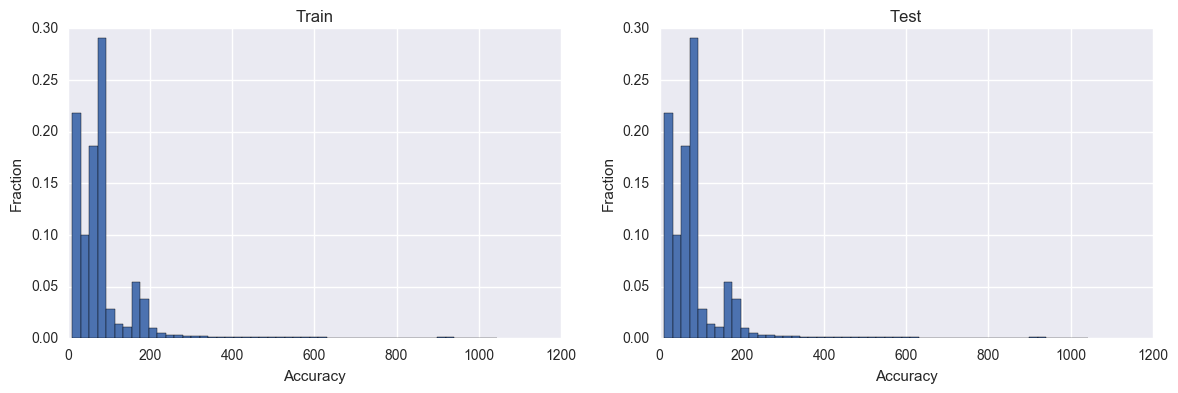

In [18]:
# Basic histograms for the distribution of accuracy and time
counts1, bins1 = np.histogram(df_train["accuracy"], bins = 50)
binsc1 = bins1[:-1] + np.diff(bins1) / 2

counts2, bins2 = np.histogram(df_train["accuracy"], bins = 50)
binsc2 = bins2[:-1] + np.diff(bins2) / 2

plt.figure(0, figsize=(14, 4))

plt.subplot(121)
plt.bar(binsc1, counts1 / (counts1.sum() * 1.0), width = np.diff(bins1)[0])
plt.grid(True)
plt.xlabel("Accuracy")
plt.ylabel("Fraction")
plt.title("Train")

plt.subplot(122)
plt.bar(binsc2, counts2 / (counts2.sum() * 1.0), width = np.diff(bins2)[0])
plt.grid(True)
plt.xlabel("Accuracy")
plt.ylabel("Fraction")
plt.title("Test")

plt.show()

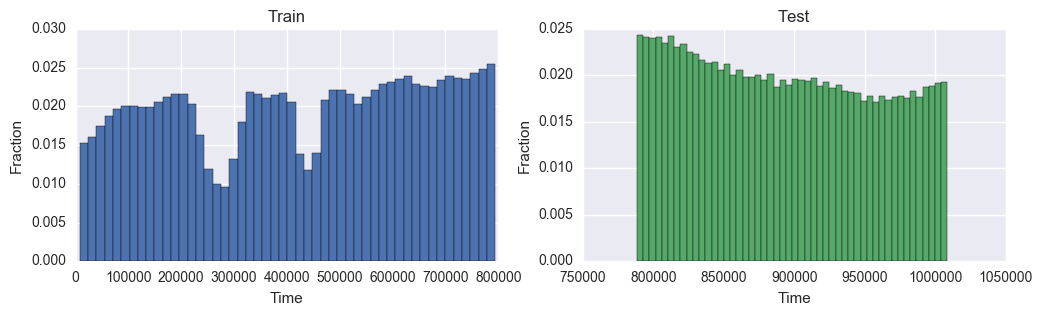

In [22]:
# Check time distributions
current_palette = sns.color_palette()

counts1, bins1 = np.histogram(df_train["time"], bins = 50)
binsc1 = bins1[:-1] + np.diff(bins1) / 2

counts2, bins2 = np.histogram(df_test["time"], bins = 50)
binsc2 = bins2[:-1] + np.diff(bins2) / 2

plt.figure(1, figsize=(12, 3))

plt.subplot(121)
plt.bar(binsc1, counts1 / (counts1.sum() * 1.0), width = np.diff(bins1)[0], color = current_palette[0])
plt.grid(True)
plt.xlabel("Time")
plt.ylabel("Fraction")
plt.title("Train")

plt.subplot(122)
plt.bar(binsc2, counts2 / (counts2.sum() * 1.0), width = np.diff(bins2)[0], color = current_palette[1])
plt.grid(True)
plt.xlabel("Time")
plt.ylabel("Fraction")
plt.title("Test")

plt.show()

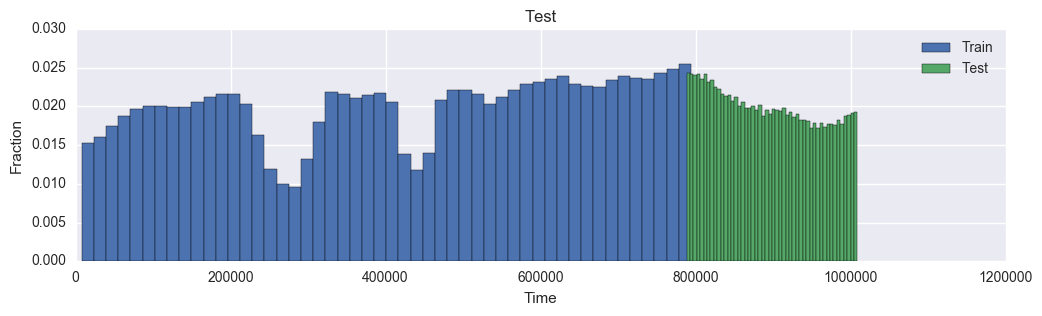

In [23]:
plt.figure(2, figsize=(12, 3))
plt.bar(binsc1, counts1 / (counts1.sum() * 1.0), width = np.diff(bins1)[0], color = current_palette[0], label = "Train")
plt.bar(binsc2, counts2 / (counts2.sum() * 1.0), width = np.diff(bins2)[0], color = current_palette[1], label = "Test")
plt.grid(True)
plt.xlabel("Time")
plt.ylabel("Fraction")
plt.title("Test")
plt.legend()
plt.show()

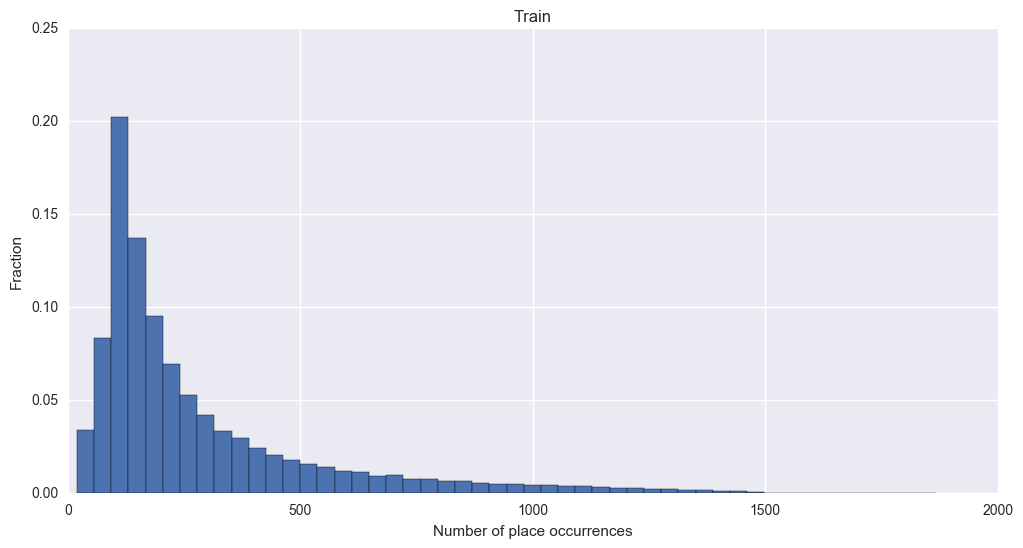

In [25]:
# How frequently different locations appear
df_placecounts = df_train["place_id"].value_counts()

counts, bins = np.histogram(df_placecounts.values, bins = 50)
binsc = bins[:-1] + np.diff(bins) / 2

plt.figure(3, figsize = (12, 6))
plt.bar(binsc, counts / (counts.sum() * 1.0), width = np.diff(bins)[0])
plt.grid(True)
plt.xlabel("Number of place occurrences")
plt.ylabel("Fraction")
plt.title("Train")
plt.show()

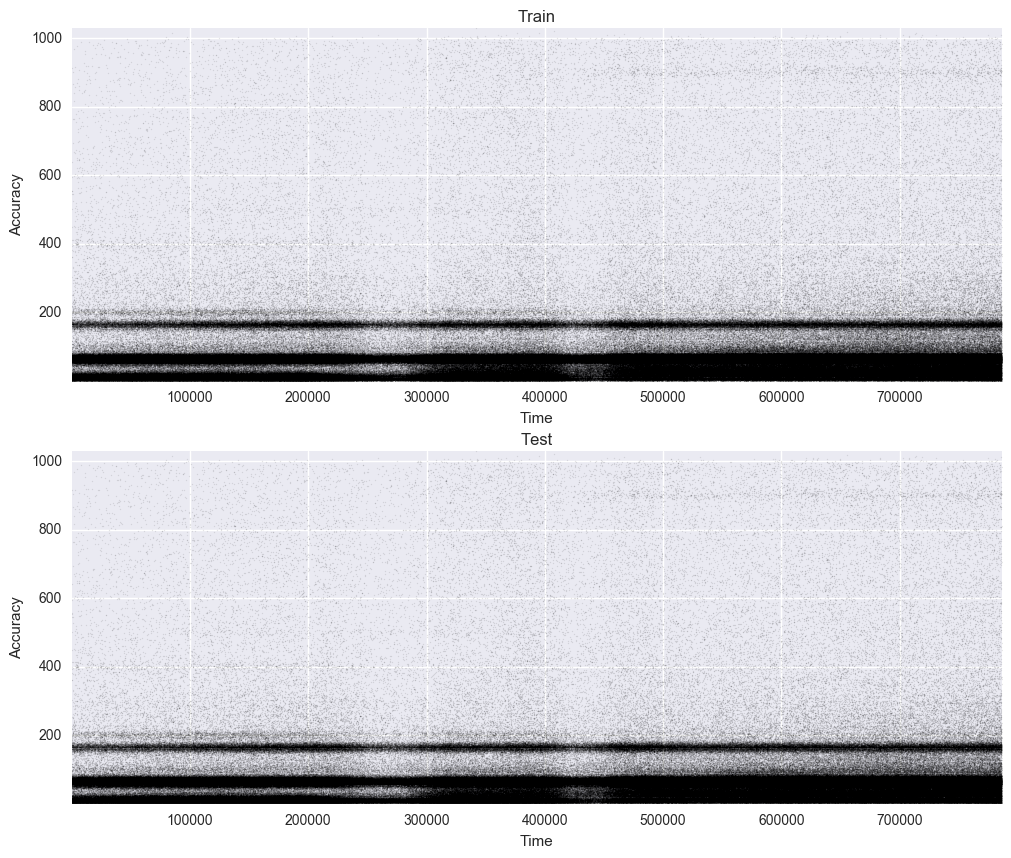

In [26]:
# If Accuracy of signal corresponds with time
plt.figure(4, figsize = (12, 10))

plt.subplot(211)
plt.scatter(df_train_sample["time"], df_train_sample["accuracy"], s = 1, c = "k", lw = 0, alpha = 0.1)
plt.xlabel("Time")
plt.ylabel("Accuracy")
plt.xlim(df_train_sample["time"].min(), df_train_sample["time"].max())
plt.ylim(df_train_sample["accuracy"].min(), df_train_sample["accuracy"].max())
plt.title("Train")

plt.subplot(212)
plt.scatter(df_train_sample["time"], df_train_sample["accuracy"], s = 1, c = "k", lw = 0, alpha = 0.1)
plt.xlabel("Time")
plt.ylabel("Accuracy")
plt.xlim(df_train_sample["time"].min(), df_train_sample["time"].max())
plt.ylim(df_train_sample["accuracy"].min(), df_train_sample["accuracy"].max())
plt.title("Test")

plt.show()

In [27]:
# Does the accuracy vary with location? Check within 100x100m spots
df_train_sample["xround"] = df_train_sample["x"].round(decimals = 1)
df_train_sample["yround"] = df_train_sample["y"].round(decimals = 1)
df_groupxy = df_train_sample.groupby(["xround", "yround"]).agg({"accuracy": [np.mean, np.std]})
df_groupxy.head()

accuracy            
                     mean         std
xround yround                        
0.0    0.0      84.500000   86.806618
       0.1      93.137255  118.352021
       0.2      79.540541  106.602740
       0.3     112.722222  193.760861
       0.4      59.920000   45.236720

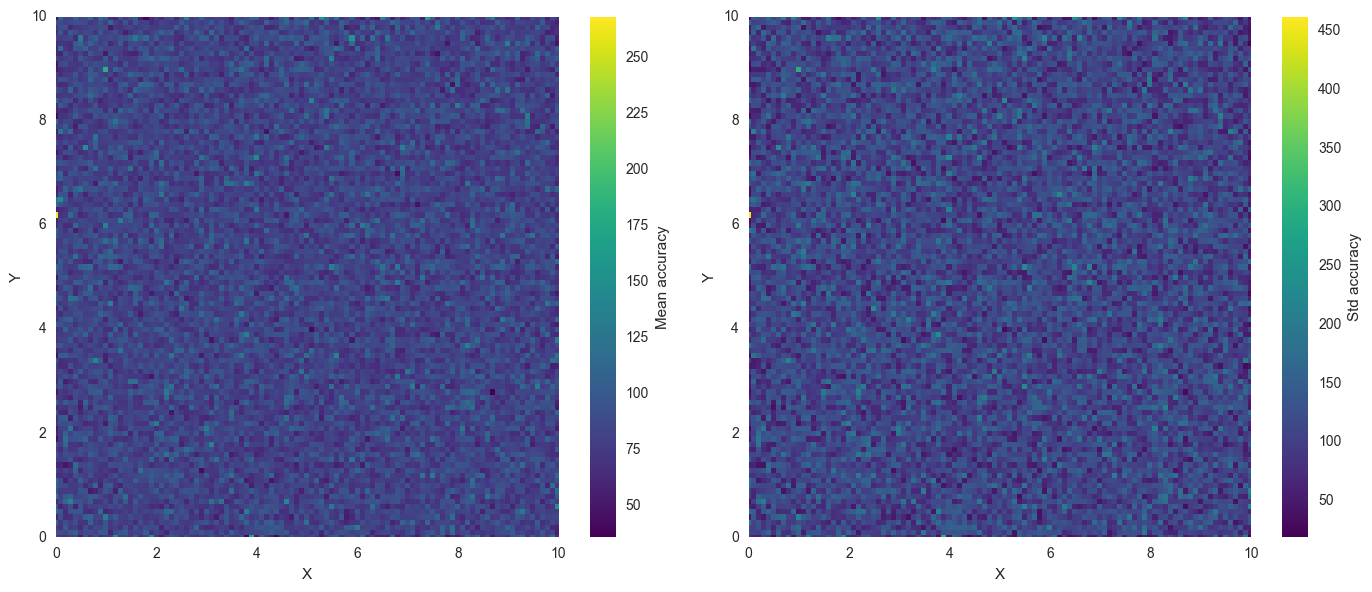

In [32]:
idx = np.asarray(list(df_groupxy.index.values))

plt.figure(5, figsize = (14, 6))
plt.subplot(121)
plt.scatter(idx[:, 0], idx[:, 1], s = 20, c = df_groupxy["accuracy", "mean"], marker = 's', lw = 0, cmap = plt.cm.viridis)
plt.colorbar().set_label("Mean accuracy")
plt.grid(True)
plt.xlabel("X")
plt.ylabel("Y")
plt.xlim(0, 10)
plt.ylim(0, 10)

plt.subplot(122)
plt.scatter(idx[:, 0], idx[:, 1], s = 20, c = df_groupxy["accuracy", "std"], marker = 's', lw = 0, cmap = plt.cm.viridis)
plt.colorbar().set_label("Std accuracy")
plt.grid(True)
plt.xlabel("X")
plt.ylabel("Y")
plt.xlim(0, 10)
plt.ylim(0, 10)

plt.tight_layout()
plt.show()

In [33]:
# Top 20 places by checkin counts
df_topplaces = df_placecounts.iloc[0:20]
l_topplaces = list(df_topplaces.index)
print(l_topplaces)

[8772469670, 1623394281, 1308450003, 4823777529, 9586338177, 9129780742, 9544215131, 5351837004, 4638096372, 8610202964, 6051554924, 7363774279, 8607353836, 8336299754, 5204012807, 7230349735, 7985287621, 4371034975, 4993591840, 7348940462]


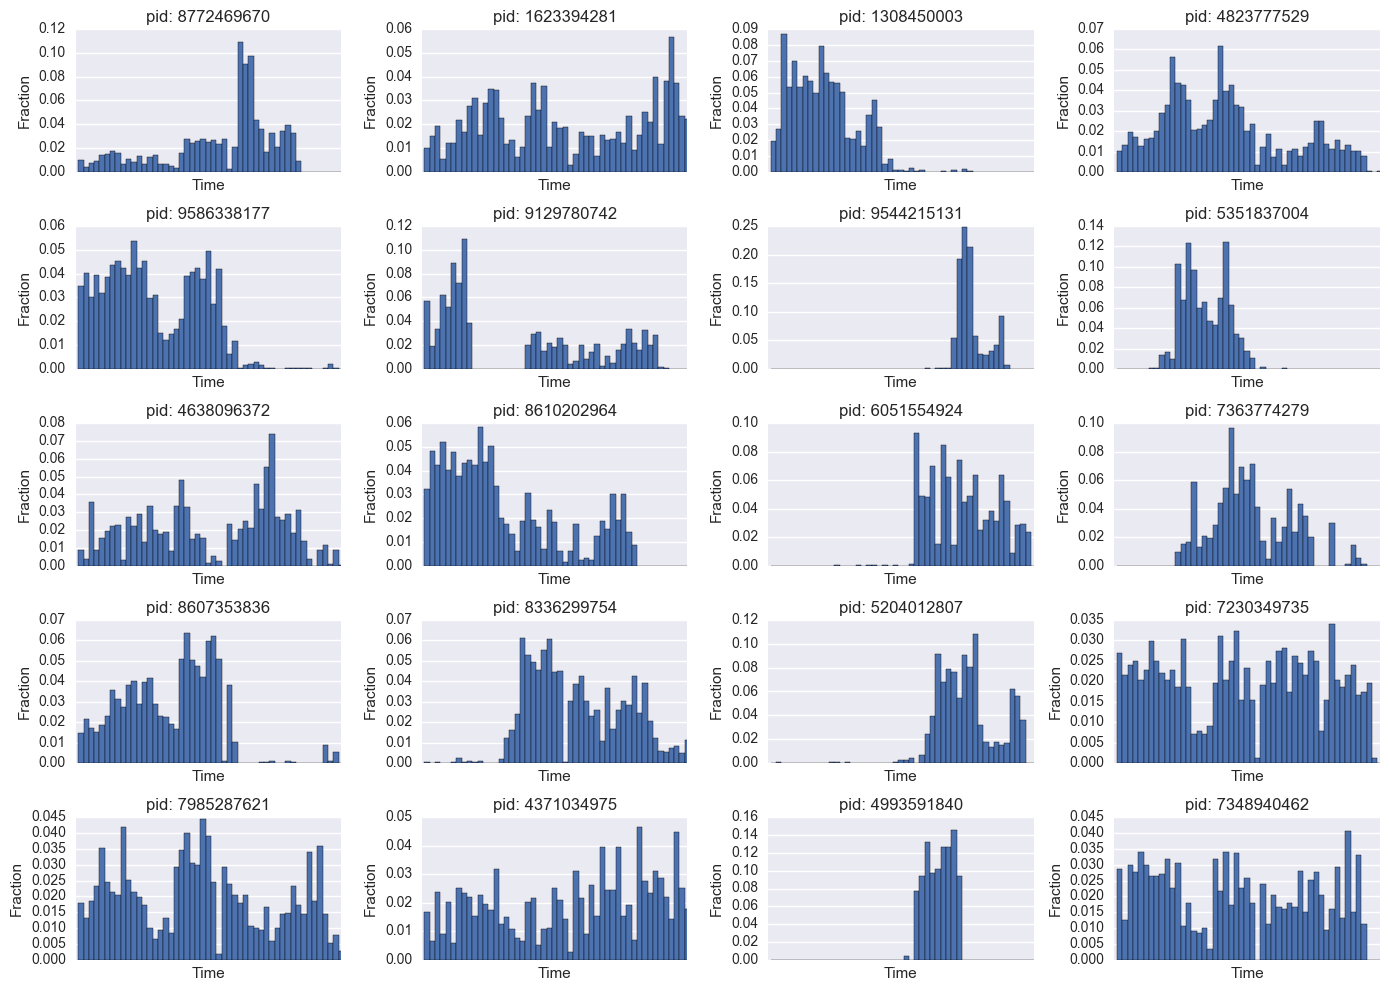

In [34]:
# Check if any of the top places have time correlated visits
plt.figure(6, figsize = (14, 10))
for i in range(len(l_topplaces)):
    place = l_topplaces[i]
    
    df_place = df_train[df_train["place_id"] == place]
    
    counts, bins = np.histogram(df_place["time"], bins = 50, range = [df_train["time"].min(), df_train["time"].max()])
    binsc = bins[:-1] + np.diff(bins) / 2
    
    plt.subplot(5, 4, i+1)
    plt.bar(binsc, counts / (counts.sum() * 1.0), width = np.diff(bins)[0])
    plt.xlim(df_train["time"].min(), df_train["time"].max())
    plt.grid(True)
    
    plt.xlabel("Time")
    plt.ylabel("Fraction")
    plt.gca().get_xaxis().set_ticks([])
    plt.title("pid: " + str(place))
    
plt.tight_layout()
plt.show()

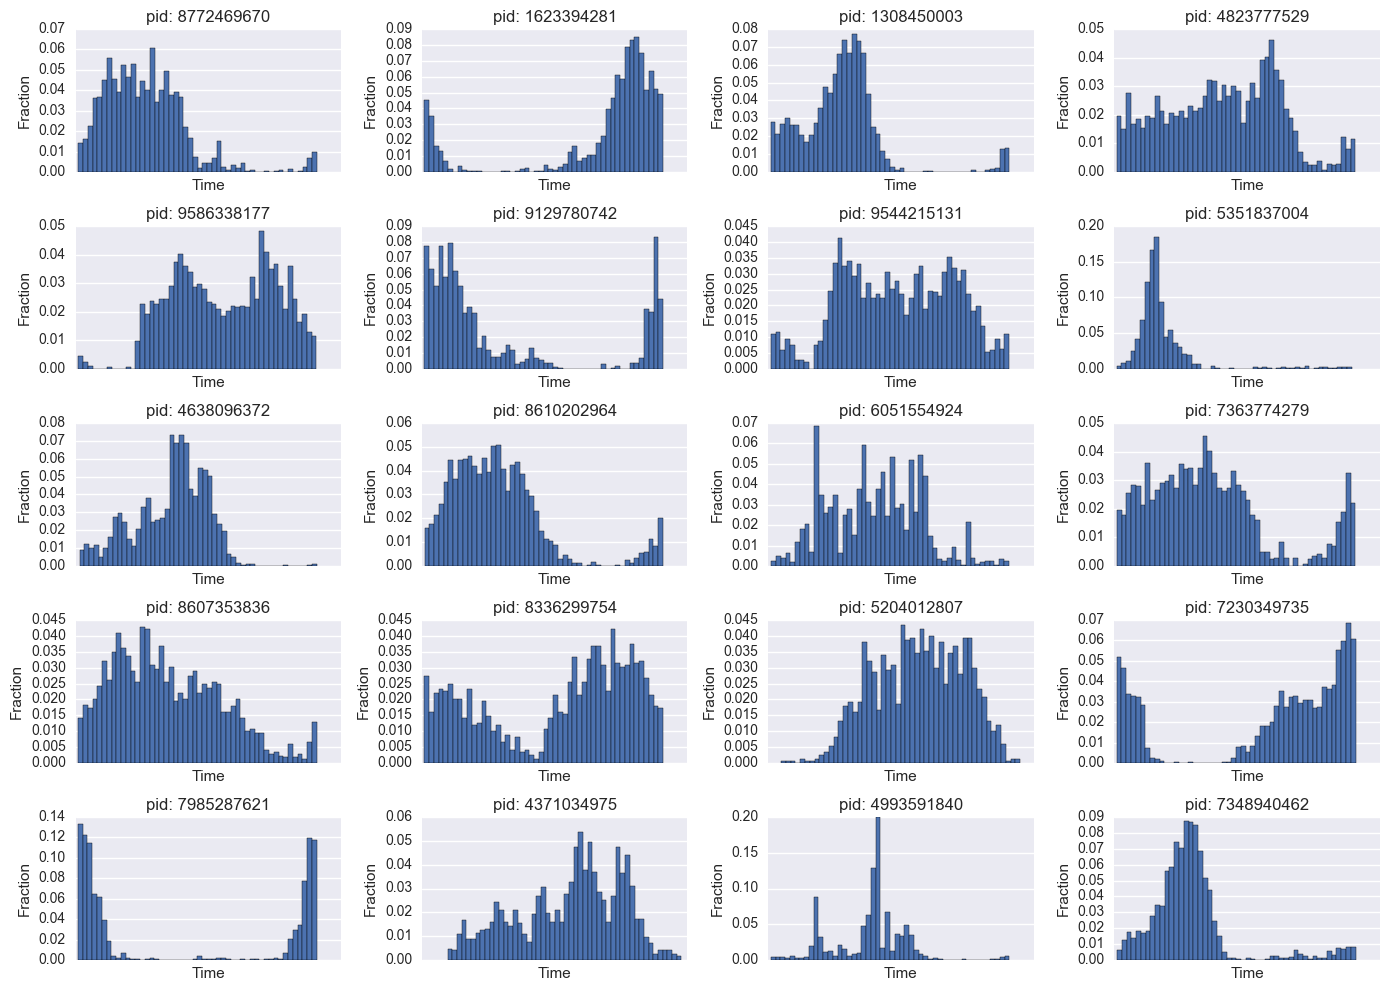

In [35]:
# Try to infer time
plt.figure(7, figsize = (14, 10))
for i in range(len(l_topplaces)):
    place = l_topplaces[i]
    
    df_place = df_train[df_train["place_id"] == place]
    
    # Try % 3600*24 to see daily trend assuming it's in seconds
    # Try %   60*24 if minutes
    counts, bins = np.histogram(df_place["time"] % (60*24), bins = 50)
    binsc = bins[:-1] + np.diff(bins) / 2
    
    plt.subplot(5, 4, i+1)
    plt.bar(binsc, counts / (counts.sum() * 1.0), width = np.diff(bins)[0])
    plt.grid(True)
    plt.xlabel("Time")
    plt.ylabel("Fraction")
    plt.gca().get_xaxis().set_ticks([])
    plt.title("pid: " + str(place))
    
plt.tight_layout()
plt.show()

In [40]:
# Add some date/time columns
df_train["hour"] = (df_train["time"] % (60*24)) / 60
df_train["dayofweek"] = np.ceil((df_train["time"] % (60 * 24 * 7)) / (60 * 24))
df_train["dayofyear"] = np.ceil((df_train["time"] % (60 * 24 * 365)) / (60 * 24))
df_train.head()

,row_id,x,y,accuracy,time,place_id,hour,hour2,dayofweek,dayofyear
0,0,0.7941,9.0809,54,470702,8523065625,21.033333,14.876389,5.0,327.0
1,1,5.9567,4.7968,13,186555,1757726713,13.250000,9.552083,4.0,130.0
2,2,8.3078,7.0407,74,322648,1137537235,1.466667,8.061111,1.0,225.0
3,3,7.3665,2.5165,65,704587,6567393236,7.116667,9.296528,7.0,125.0
4,4,4.0961,1.1307,31,472130,7440663949,20.833333,15.868056,6.0,328.0


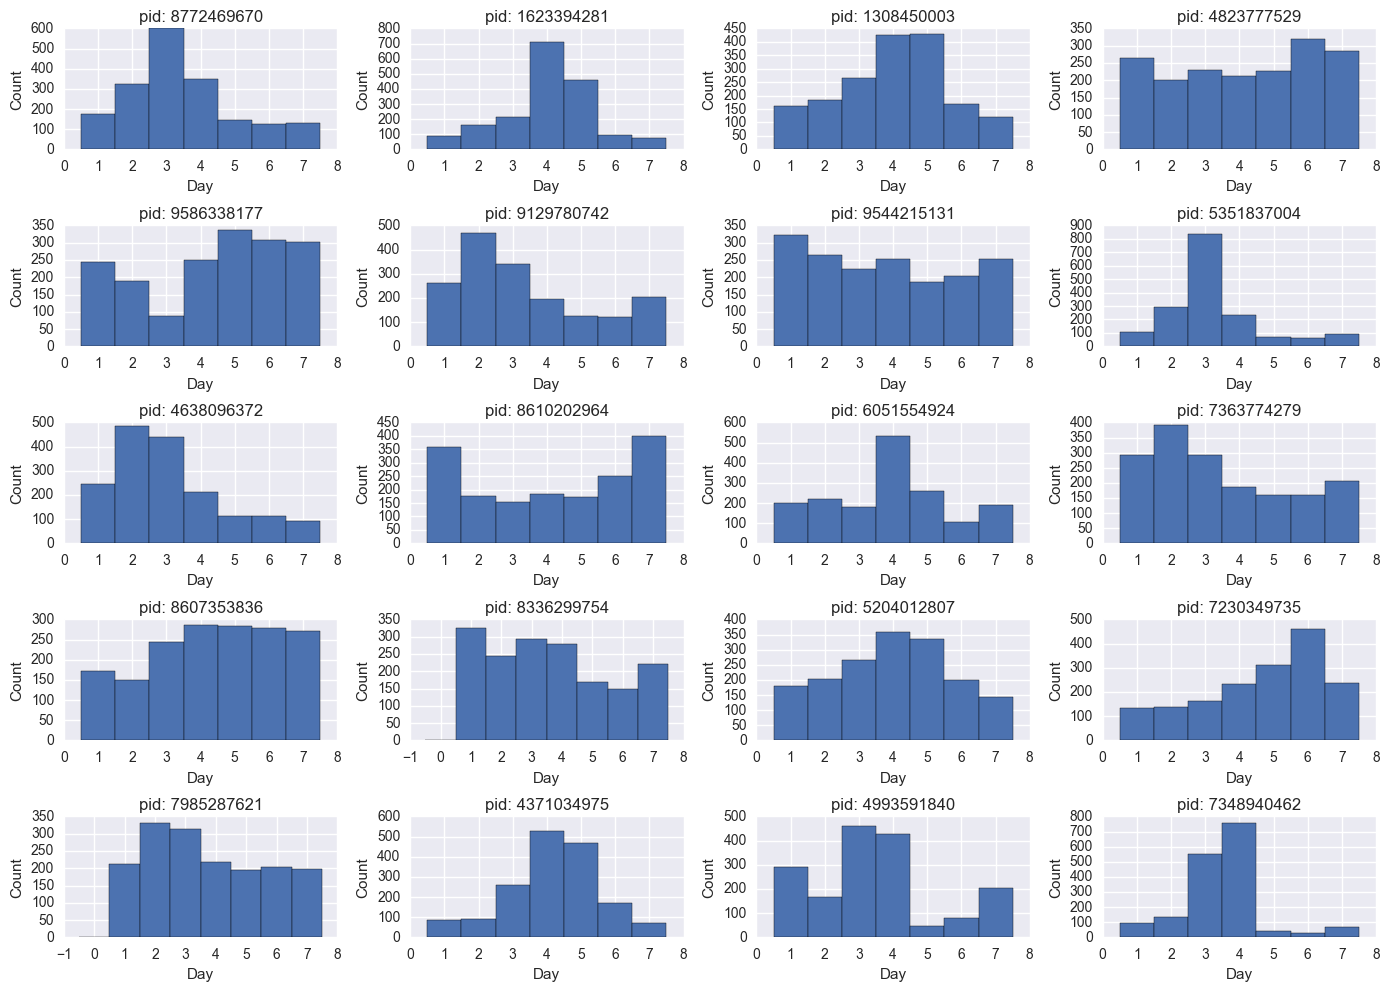

In [41]:
# Check the top 20 locations again for any weekly trends
plt.figure(8, figsize = (14, 10))
for i in range(20):
    place = l_topplaces[i]
    df_place = df_train[df_train["place_id"] == place]
    
    # Group by weekday
    df_groupday = df_place.groupby("dayofweek").agg("count")
    
    plt.subplot(5, 4, i+1)
    plt.bar(df_groupday.index.values - 0.5, df_groupday["time"], width = 1)
    plt.grid(True)
    plt.xlabel("Day")
    plt.ylabel("Count")
    plt.title("pid: " + str(place))
    
plt.tight_layout()
plt.show()

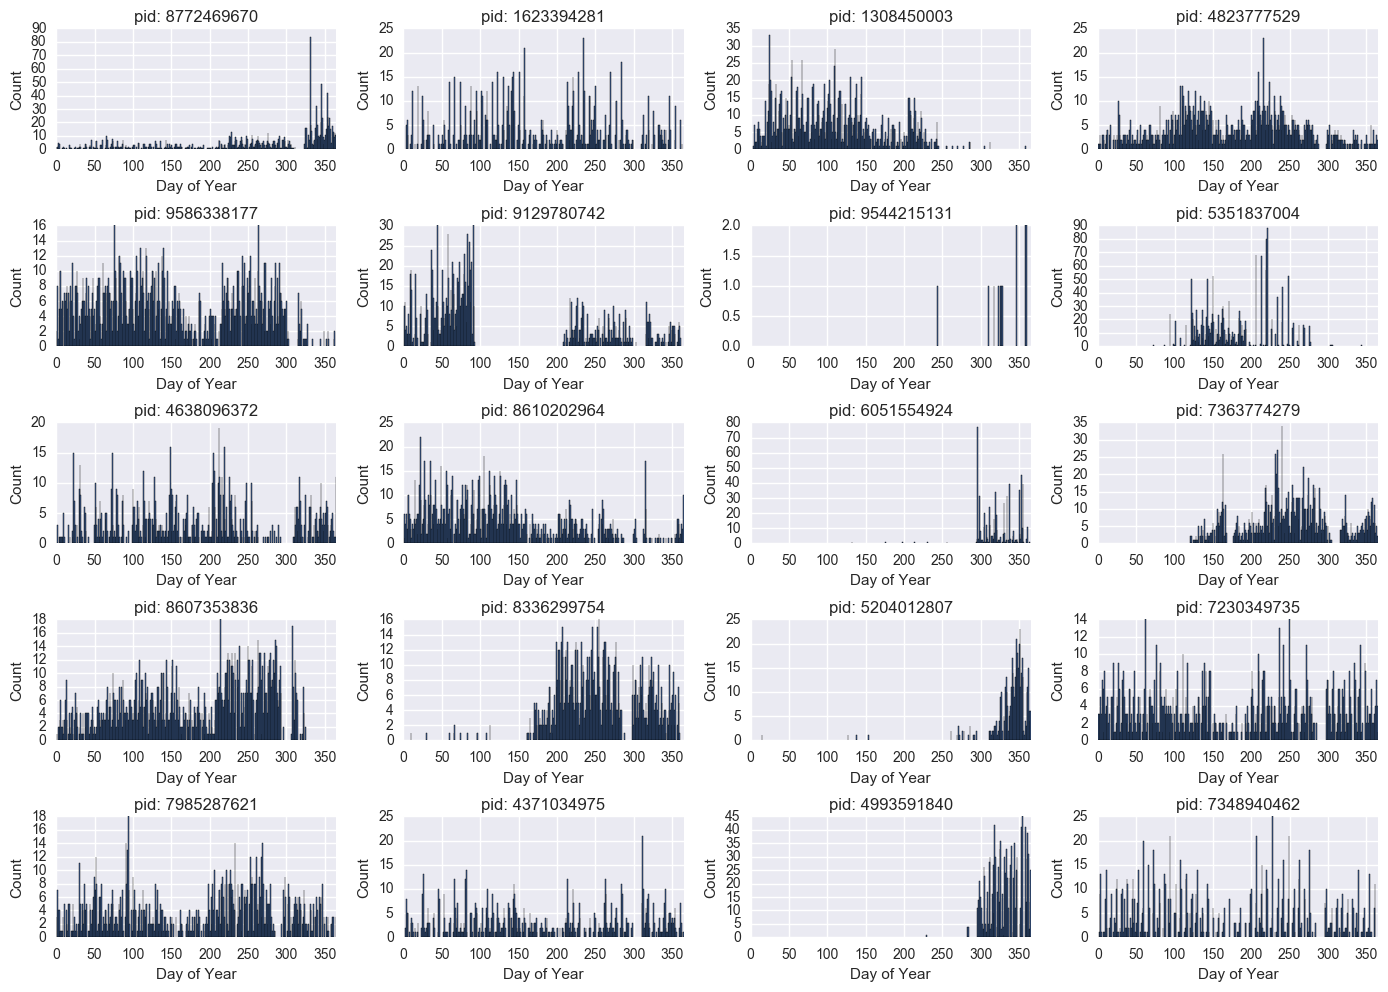

In [42]:
# Day of Year
plt.figure(9, figsize = (14, 10))
for i in range(20):
    place = l_topplaces[i]
    df_place = df_train[df_train["place_id"] == place]
    
    # Add some columns
    df_place = df_place[df_place["time"] < (60 * 24 * 365)] # Restrict to 1 year so the counts don't double up
    df_groupday = df_place.groupby("dayofyear").agg("count")
    
    plt.subplot(5, 4, i+1)
    plt.bar(df_groupday.index.values - 0.5, df_groupday["time"], width = 1)
    plt.grid(True)
    plt.xlabel("Day of Year")
    plt.ylabel("Count")
    plt.xlim(0, 365)
    plt.title("pid: " + str(place))
    
plt.tight_layout()
plt.show()

C:\local\Anaconda3-4.1.1-Windows-x86_64\envs\cntk-py35\lib\site-packages\ipykernel\__main__.py:13: RuntimeWarning: divide by zero encountered in log10


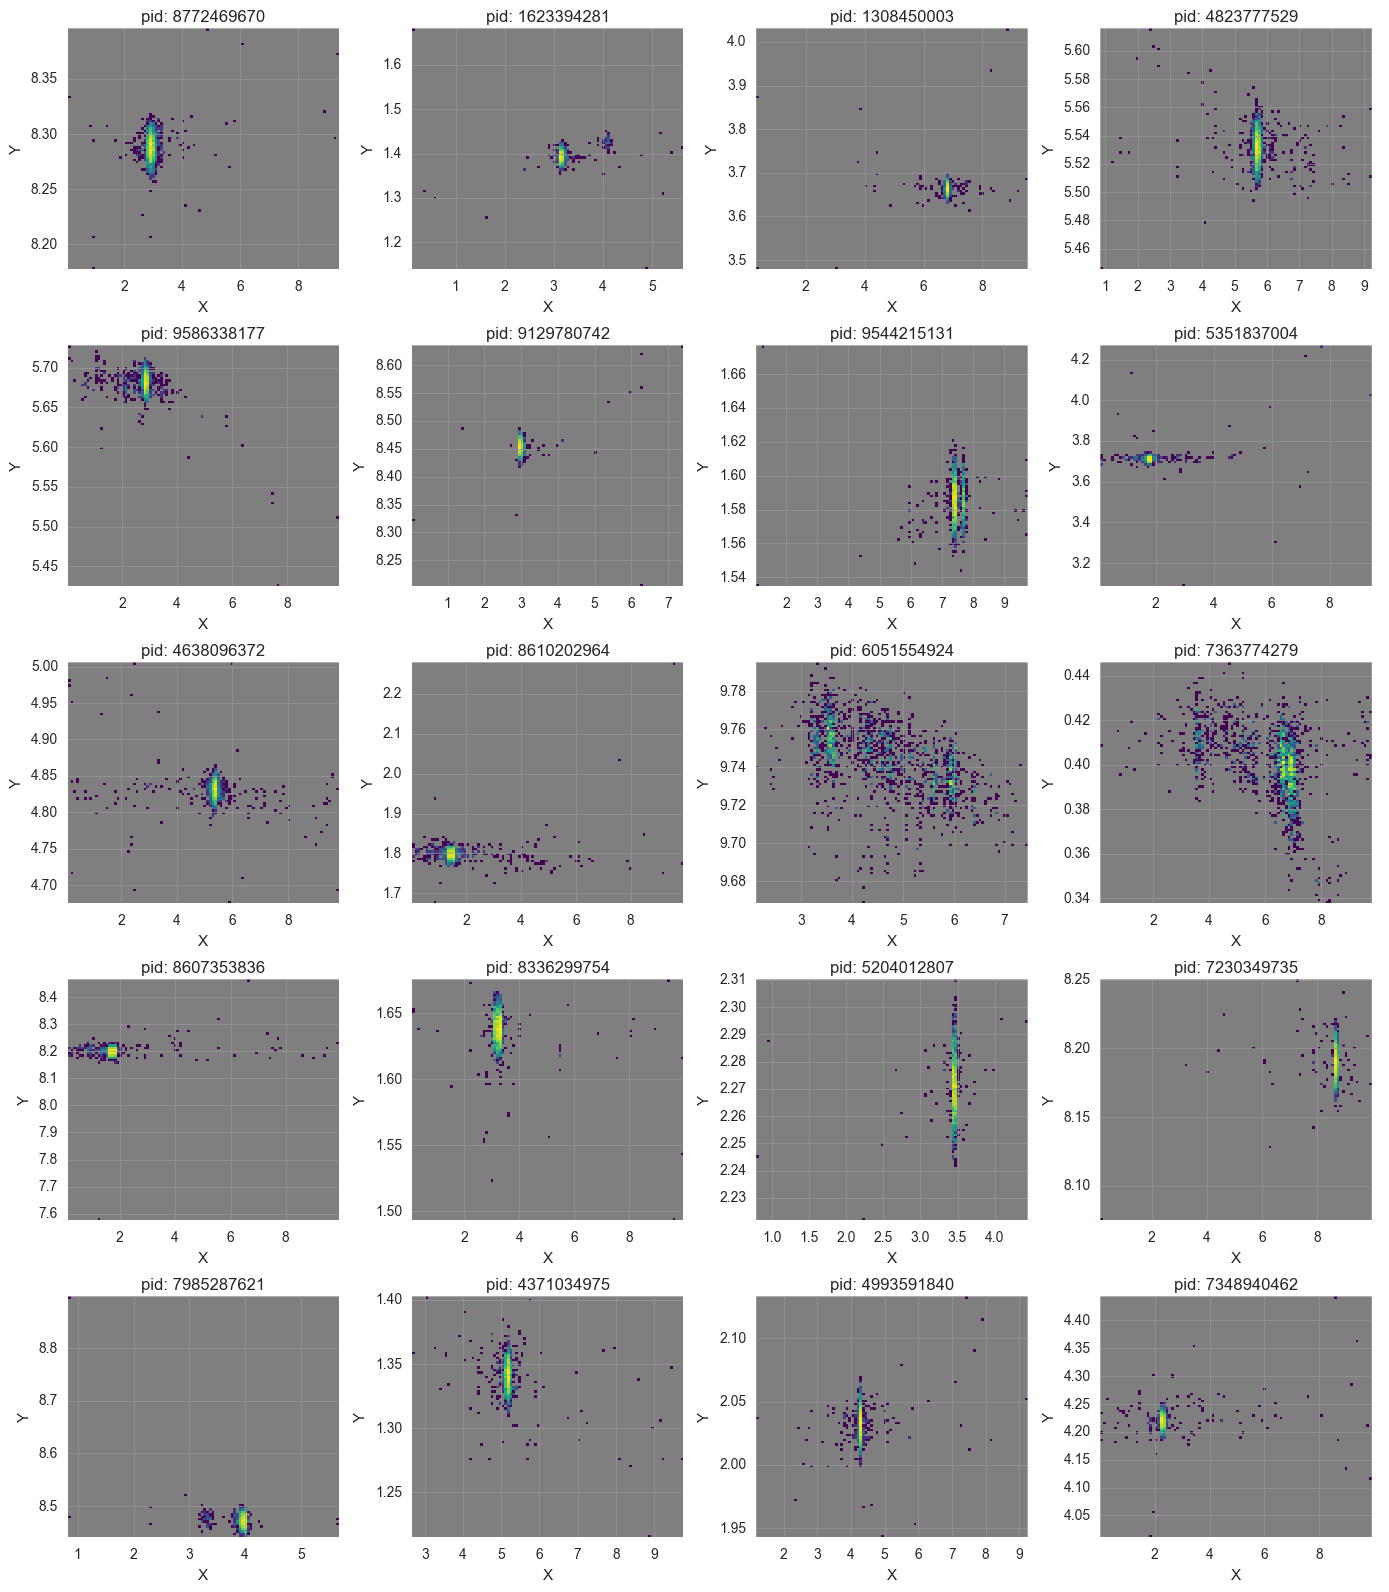

In [45]:
# Check the 2d distribution of (x, y) for the top 20 places
plt.figure(10, figsize=(14,16))
cmapm = plt.cm.viridis
cmapm.set_bad("0.5", 1.)

for i in range(len(l_topplaces)):
    place = l_topplaces[i]
    df_place = df_train[df_train["place_id"] == place]
    counts, binsX, binsY = np.histogram2d(df_place["x"], df_place["y"], bins = 100)
    extent = [binsX.min(), binsX.max(), binsY.min(), binsY.max()]
    
    plt.subplot(5, 4, i+1)
    plt.imshow(np.log10(counts.T),
              interpolation = "none",
              origin = "lower",
              extent = extent,
              aspect = "auto",
              cmap = cmapm)
    
    plt.grid(True, c = '0.6', lw = 0.5)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("pid: " + str(place))

plt.tight_layout()
plt.show()

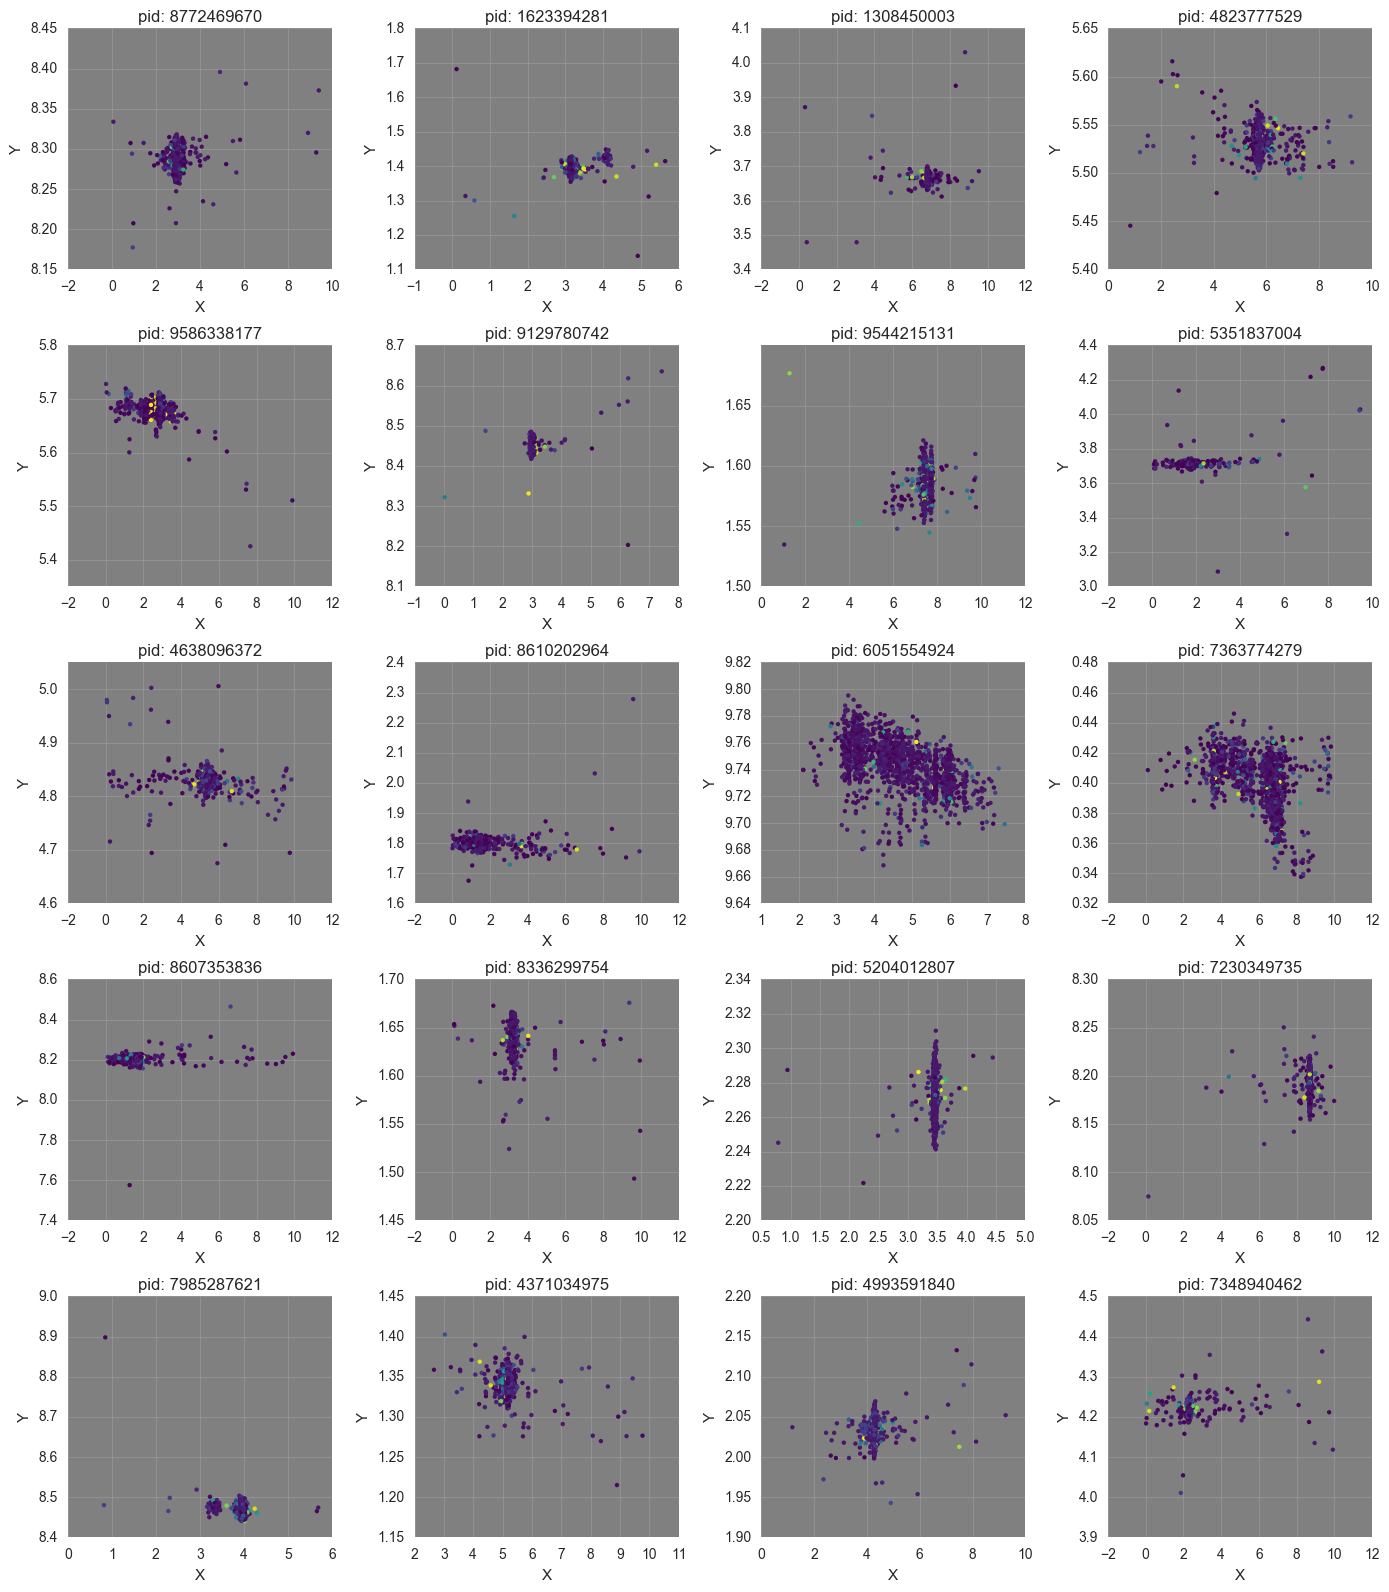

In [49]:
# Check if the accuracy varies with distance from the centroid point
plt.figure(11, figsize = (14, 16))

for i in range(len(l_topplaces)):
    plt.subplot(5, 4, i+1)
    plt.gca().set_axis_bgcolor("0.5")
    place = l_topplaces[i]
    df_place = df_train[df_train["place_id"] == place]
    plt.scatter(df_place["x"], df_place["y"], s = 10, c = df_place["accuracy"], lw = 0, cmap = plt.cm.viridis)
    plt.grid(True, c = '0.6', lw = 0.5)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("pid: " + str(place))
    
plt.tight_layout()
plt.show()

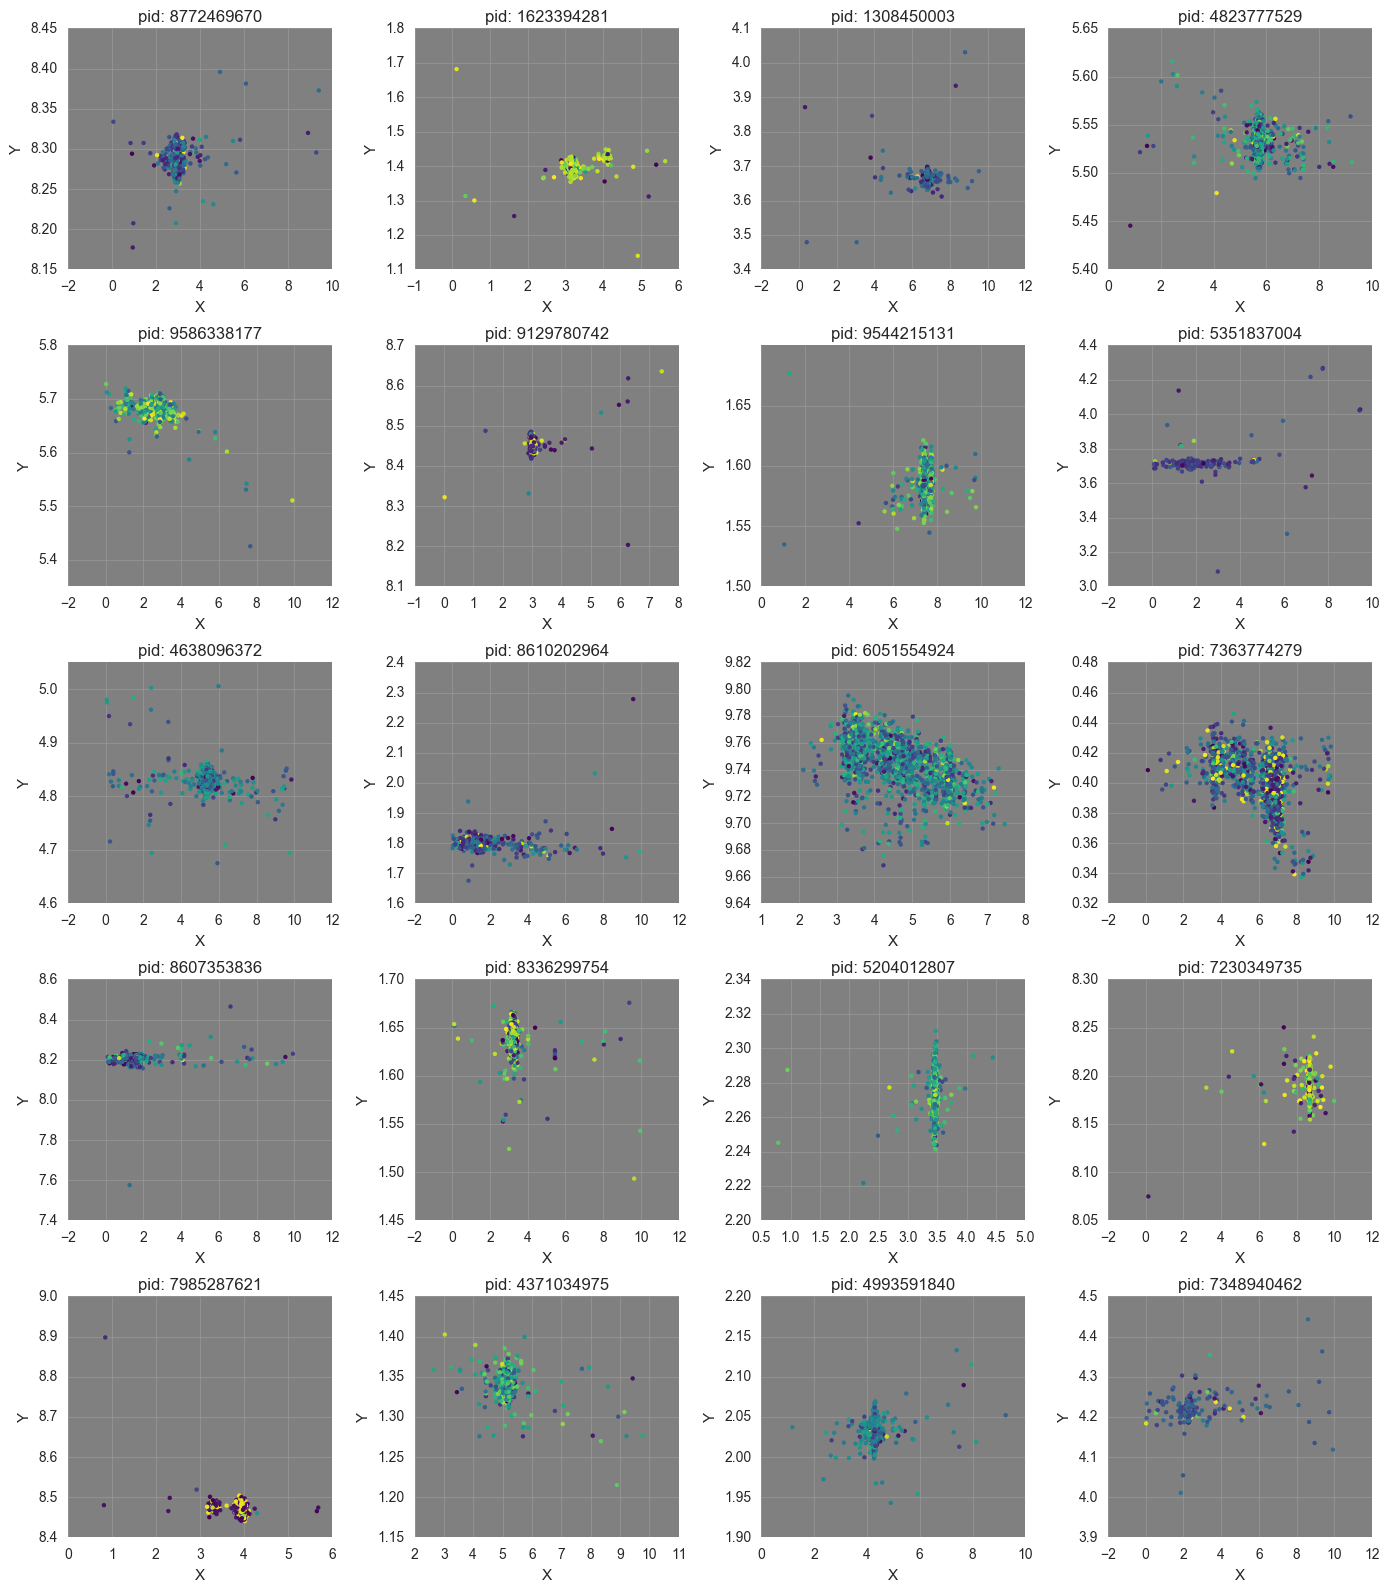

In [50]:
# Check if the time varies with distance from the centroid point
plt.figure(12, figsize = (14, 16))

for i in range(len(l_topplaces)):
    plt.subplot(5, 4, i+1)
    plt.gca().set_axis_bgcolor("0.5")
    place = l_topplaces[i]
    df_place = df_train[df_train["place_id"] == place]
    plt.scatter(df_place["x"], df_place["y"], s = 10, c = df_place["hour"], lw = 0, cmap = plt.cm.viridis)
    plt.grid(True, c = '0.6', lw = 0.5)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("pid: " + str(place))
    
plt.tight_layout()
plt.show()